
**EDA para Siniestros Viales**

Este análisis exploratorio de datos (EDA) tiene como objetivo comprender mejor las características de los siniestros viales en la Ciudad de Buenos Aires entre 2016 y 2021. La información se basa en un dataset proporcionado por el Observatorio de Movilidad y Seguridad Vial (OMSV) que contiene dos hojas: "hechos" y "víctimas".

**Primero instalamos librerias necesarias**

In [1114]:
import re
import sketch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geojson
from summarytools import dfSummary
from datetime import datetime
import warnings

# Ignorar todas las advertencias
warnings.filterwarnings("ignore")

**Carga de datos**

In [1115]:

# Leer datos desde los archivos Excel y asignarlos a DataFrames
hechos = pd.read_excel('C:\\Users\\Usuario\\Desktop\\DATAOPS-SINIESTROS-VIALES\\DATASET excel\\homicidios.xlsx')
victimas = pd.read_excel('C:\\Users\\Usuario\\Desktop\\DATAOPS-SINIESTROS-VIALES\\DATASET excel\\homicidios.xlsx', sheet_name='VICTIMAS')

**Descripción general de los datos**

In [1116]:
hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


***Valores ausentes:
Se nota que las columnas "Altura" y "Cruce" presentan una cantidad sustancial de valores ausentes. Ante esta situación, se plantea la necesidad de abordar estratégicamente estos datos faltantes, ya sea mediante técnicas de imputación o con una consideración especial durante el análisis, con el objetivo de garantizar la integridad y la validez de los resultados obtenidos.***

In [1117]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc



---
***Mostramos las columnas del dataset hechos***


---




In [1118]:
hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [1119]:
# Sumar todos los valores de la columna 'Num_víctimas'
suma_total_victimas = hechos['N_VICTIMAS'].sum()
suma_total_victimas


# Decoradores para resaltar la salida
print("\n" + "*" * 40)
print(f"Suma total de la columna 'Num_víctimas': {suma_total_victimas}")
print("*" * 40 + "\n")



****************************************
Suma total de la columna 'Num_víctimas': 717
****************************************



In [1120]:
hechos["N_VICTIMAS"].describe()

count    696.000000
mean       1.030172
std        0.179393
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: N_VICTIMAS, dtype: float64


****Mostramos una descripcion directa de los datos en cada columna del dataset hechos****

---

***Variable*** | ***Descripción*** | ***Tipo de dato***
--- | --- | ---
Id | Identificador único de cada homicidio | int64
N victimas | Número de víctimas en el homicidio | int64
Fecha | Fecha del homicidio | datetime64[ns]
Mes | Mes del homicidio | int64
Día | Día del mes del homicidio | int64
Hora total | Hora del homicidio en formato HH:MM:SS | object
Hora | Hora del homicidio en formato HH | object
Lugar_del_hecho | Lugar donde ocurrió el homicidio | object
Tipo_de_calle | Tipo de calle donde ocurrió el homicidio | object
Calle | Nombre de la calle donde ocurrió el homicidio | object
Altura | Altura de la calle donde ocurrió el homicidio | float64
Cruce | Calle que cruza con la calle donde ocurrió el homicidio | object
Dirección normalizada | Dirección normalizada del lugar del homicidio | object
Comuna | Comuna donde ocurrió el homicidio | int64
Xy (caba) | Coordenadas X e Y del lugar del homicidio | object
Pos X | Coordenada X del lugar del homicidio | object
Pos y | Coordenada Y del lugar del homicidio | object
Participantes | Información sobre los participantes en el homicidio | object
Victima | Información sobre la víctima del homicidio | object
Acusado | Información sobre el acusado del homicidio | object

---



Eliminamos las columnas

In [1121]:
hechos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

***Crear la nueva columna 'UBICACION' con valores binarios donde Cruce es 1 y  Altura es 0 pues ya estos datos existen en la columna Direccion_normalizada.***

In [1122]:
import pandas as pd

# Definir la función para asignar valores a la nueva columna
def asignar_ubicacion(row):
    if pd.notna(row['Cruce']):
        return 1
    elif pd.notna(row['Altura']):
        return 0
    else:
        return None  # Puedes ajustar esto según tus necesidades si hay casos que no cumplen ninguna condición

# Crear la nueva columna 'UBICACION' utilizando apply
hechos['UBICACION'] = hechos.apply(asignar_ubicacion, axis=1)

hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,UBICACION
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,1.0
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,1.0
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,0.0
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,1.0
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,1.0
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,1.0
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,1.0
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,0.0


In [1123]:
# Obtener el recuento total de todos los valores en todas las columnas
conteo_total = hechos.apply(pd.Series.value_counts).fillna(0)

# Imprimir el resultado
print(conteo_total)

              ID  N_VICTIMAS  FECHA  AAAA    MM    DD  HORA    HH  \
1            0.0       676.0    0.0   0.0  62.0  18.0   0.0  24.0   
2            0.0        19.0    0.0   0.0  56.0  22.0   0.0  17.0   
3            0.0         1.0    0.0   0.0  51.0  27.0   0.0  26.0   
2016-0001    1.0         0.0    0.0   0.0   0.0   0.0   0.0   0.0   
2016-0002    1.0         0.0    0.0   0.0   0.0   0.0   0.0   0.0   
...          ...         ...    ...   ...   ...   ...   ...   ...   
MOVIL        0.0         0.0    0.0   0.0   0.0   0.0   0.0   0.0   
OBJETO FIJO  0.0         0.0    0.0   0.0   0.0   0.0   0.0   0.0   
PEATON_MOTO  0.0         0.0    0.0   0.0   0.0   0.0   0.0   0.0   
OTRO         0.0         0.0    0.0   0.0   0.0   0.0   0.0   0.0   
TREN         0.0         0.0    0.0   0.0   0.0   0.0   0.0   0.0   

             LUGAR_DEL_HECHO  TIPO_DE_CALLE  ...  Cruce  \
1                        0.0            0.0  ...    0.0   
2                        0.0            0.0  ...    0

In [1124]:

# Iterar sobre cada columna e imprimir sus valores únicos y sus cuentas
for columna in hechos.columns:
    print(f"Valores únicos en la columna '{columna}':")
    print(hechos[columna].value_counts())
    print("\n")

# Apilar las columnas en una serie y contar los valores
conteo_total = hechos.stack().value_counts()

# Imprimir el resultado
print(conteo_total)

Valores únicos en la columna 'ID':
ID
2016-0001    1
2019-0050    1
2019-0042    1
2019-0043    1
2019-0044    1
            ..
2017-0111    1
2017-0112    1
2017-0113    1
2017-0114    1
2021-0097    1
Name: count, Length: 696, dtype: int64


Valores únicos en la columna 'N_VICTIMAS':
N_VICTIMAS
1    676
2     19
3      1
Name: count, dtype: int64


Valores únicos en la columna 'FECHA':
FECHA
2018-12-18    3
2016-11-26    3
2018-12-22    3
2018-02-17    3
2016-02-28    3
             ..
2017-10-30    1
2017-10-27    1
2017-10-26    1
2017-10-17    1
2021-11-18    1
Name: count, Length: 598, dtype: int64


Valores únicos en la columna 'AAAA':
AAAA
2016    144
2018    143
2017    131
2019    103
2021     97
2020     78
Name: count, dtype: int64


Valores únicos en la columna 'MM':
MM
12    78
11    67
8     65
1     62
5     60
6     58
2     56
3     51
7     51
10    51
4     50
9     47
Name: count, dtype: int64


Valores únicos en la columna 'DD':
DD
20    31
17    30
3     27
11   

In [1125]:
# Eliminar las columnas mencionadas
hechos.drop(['HORA', 'Cruce', 'Altura', 'XY (CABA)', 'Calle', 'LUGAR_DEL_HECHO'], axis=1, inplace= True)

In [1126]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HH                     696 non-null    object        
 7   TIPO_DE_CALLE          696 non-null    object        
 8   Dirección Normalizada  688 non-null    object        
 9   COMUNA                 696 non-null    int64         
 10  pos x                  696 non-null    object        
 11  pos y                  696 non-null    object        
 12  PARTICIPANTES          696 non-null    object        
 13  VICTI

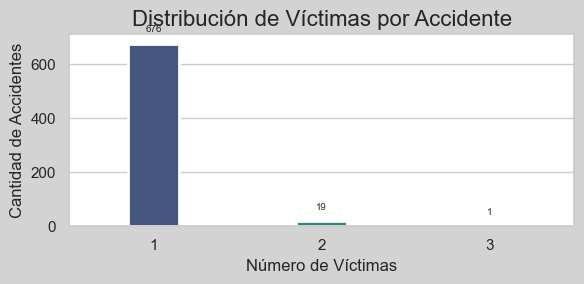

In [1127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración para hacer el gráfico más responsivo con fondo gris
sns.set(style="whitegrid")  # Establecer el estilo de fondo
fig, ax = plt.subplots(figsize=(6, 3), facecolor='lightgray')  # Tamaño proporcional al ancho y alto, fondo gris

# Grosor de las barras
bar_width = 0.3

# Graficar la distribución con colores específicos y grosor ajustado
ax = sns.countplot(x=hechos['N_VICTIMAS'], palette='viridis', linewidth=2, width=bar_width)

plt.title('Distribución de Víctimas por Accidente', fontsize=16)  # Ajustar el tamaño del título

plt.xlabel('Número de Víctimas', fontsize=12)  # Ajustar el tamaño de la etiqueta del eje x
plt.ylabel('Cantidad de Accidentes', fontsize=12)  # Ajustar el tamaño de la etiqueta del eje y

# Agregar el total en la parte superior de las barras con texto ajustable
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", xytext=(0, 10), textcoords="offset points", fontsize=7)

plt.tight_layout()  # Ajustar el diseño para evitar solapamientos

# Mostrar el gráfico
plt.show()


**Resumen de Datos de Homicidios: Tendencia de Fatalidad**

El análisis de los datos de homicidios revela una tendencia constante en la fatalidad, con un promedio de una persona víctima por accidente. La columna 'N_VICTIMAS' muestra que, en general, la mayoría de los incidentes involucran una única víctima. Este patrón sugiere una consistencia en la gravedad de los homicidios, con una prevalencia de situaciones donde solo una persona resulta afectada. Este insight es crucial para entender la dinámica de los homicidios y puede ser valioso para la implementación de estrategias preventivas y medidas de seguridad. La atención continua a este indicador puede ayudar a las autoridades y a la comunidad en general a mejorar la seguridad y reducir el impacto trágico de estos eventos.



---


***Se realiza una graficación de muertes fatales por año***


---



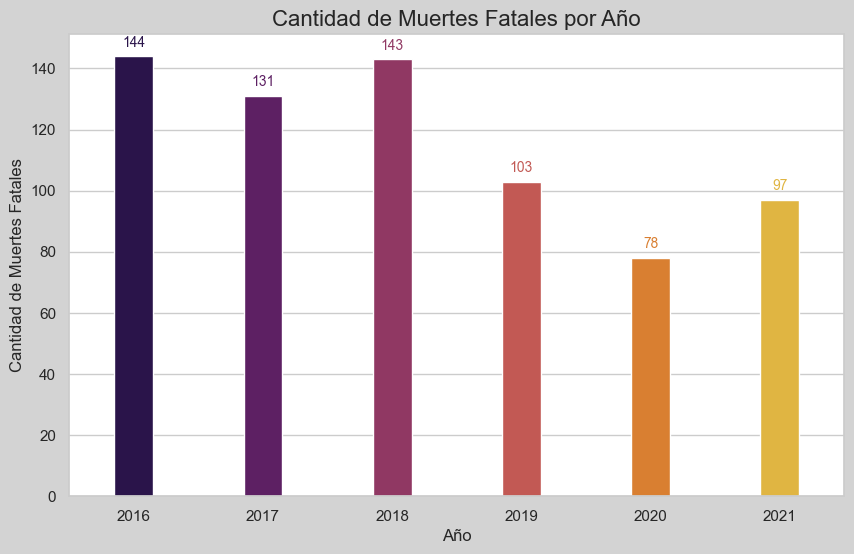

In [1128]:
# Configuración del estilo de fondo y lienzo gris
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6), facecolor='lightgray')  # Fondo gris claro

# Grosor de las barras
bar_width = 0.3

# Crear un gráfico de barras para visualizar la cantidad de fatalidades por año
sns.countplot(x=hechos['AAAA'], palette='inferno', width=bar_width)

# Ajustar las etiquetas y el título
plt.title('Cantidad de Muertes Fatales por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de Muertes Fatales', fontsize=12)

# Agregar el número de fatalidades dentro de cada barra con el color de la barra
for p in ax.patches:
    color = p.get_facecolor()  # Obtener el color de la barra
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", xytext=(0, 10), textcoords="offset points", fontsize=10, color=color)

# Mostrar el gráfico
plt.show()



***Resumen de la cantidad de muertes fatales por año***

La visualización de fatalidades por año muestra que los años 2016, 2017 y 2018 experimentaron las mayores cantidades de muertes fatales, indicando una tendencia bastante simétrica. Sin embargo, en 2020, la cifra disminuyó significativamente, probablemente debido a las restricciones y confinamientos asociados con la pandemia. Este descenso sugiere un impacto directo de las medidas de seguridad en la reducción de accidentes mortales durante ese período.

In [1129]:
#Filtramos los valores SD o sin dato y convertimos la columna Hora en numérica para mejor análisis de la columna

import pandas as pd
# Filtrar valores SD o sin dato
hechos = hechos[hechos['HH'] != 'SD']


# Convertir la columna Hora en numérica
hechos['HH'] = pd.to_numeric(hechos['HH'])

# Mostrar las primeras filas del DataFrame
hechos.head()


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,UBICACION
0,2016-0001,1,2016-01-01,2016,1,1,4,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,1.0
1,2016-0002,1,2016-01-02,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,1.0
2,2016-0003,1,2016-01-03,2016,1,3,7,AVENIDA,ENTRE RIOS AV. 2034,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,0.0
3,2016-0004,1,2016-01-10,2016,1,10,0,AVENIDA,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,1.0
4,2016-0005,1,2016-01-21,2016,1,21,5,AVENIDA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,1.0


In [1130]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 0 to 695
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     695 non-null    object        
 1   N_VICTIMAS             695 non-null    int64         
 2   FECHA                  695 non-null    datetime64[ns]
 3   AAAA                   695 non-null    int64         
 4   MM                     695 non-null    int64         
 5   DD                     695 non-null    int64         
 6   HH                     695 non-null    int64         
 7   TIPO_DE_CALLE          695 non-null    object        
 8   Dirección Normalizada  687 non-null    object        
 9   COMUNA                 695 non-null    int64         
 10  pos x                  695 non-null    object        
 11  pos y                  695 non-null    object        
 12  PARTICIPANTES          695 non-null    object        
 13  VICTIMA   

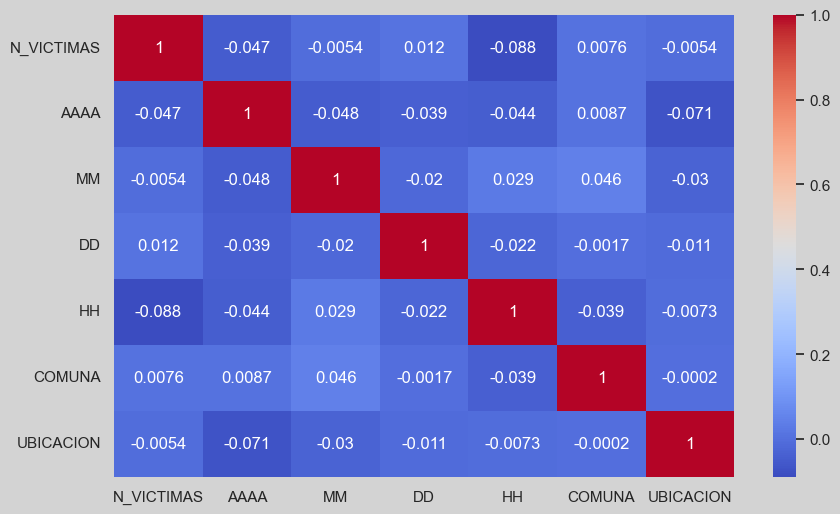

In [1131]:
# Crear copia del DataFrame con solo columnas numéricas
columnas_numericas = hechos.select_dtypes(include=['float64', 'int64']).columns
hechos_numericas = hechos[columnas_numericas].copy()

# Calcular la matriz de correlación de Pearson
corr_hechos = hechos_numericas.corr()

# Configurar el estilo de fondo y lienzo gris
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6), facecolor='lightgray')  # Fondo gris claro

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(corr_hechos, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.show()




Se concluyó con respecto al gráfico de correlación de pearson los valores más correlacionados en el dataframe no representan una relacion directa en cuanto a la categoria pues son series de tiempo que no ocurren en el mismo lugar ni a la misma hora ni el mismo año y si ocurriera seria un valor átipico lo que implica relevancia en la toma de decisiones con estos valores a la hora de eliminar datos nulos o faltantes.

In [1132]:
# Suponiendo que df es tu DataFrame y "direccion_normal" es la columna con valores nulos
hechos = hechos.dropna(subset=['Dirección Normalizada'])

In [1133]:
# Contar los valores nulos en cada columna de todo el dataframe hechos
null_values = hechos.isnull().sum()
print(null_values) 


ID                        0
N_VICTIMAS                0
FECHA                     0
AAAA                      0
MM                        0
DD                        0
HH                        0
TIPO_DE_CALLE             0
Dirección Normalizada     0
COMUNA                    0
pos x                     0
pos y                     0
PARTICIPANTES             0
VICTIMA                   0
ACUSADO                   0
UBICACION                34
dtype: int64


**Este gráfico proporciona una representación visual clara de la presencia de valores nulos en el conjunto de datos "hechos". La identificación de estos valores nulos es crucial para evaluar la necesidad de realizar una limpieza de datos. La eliminación de estos valores nulos es un paso esencial para mejorar la integridad y la confiabilidad del conjunto de datos, lo que a su vez contribuirá a una interpretación más precisa y a la efectividad de cualquier análisis o modelo que se aplique posteriormente.**

In [1134]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687 entries, 0 to 695
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     687 non-null    object        
 1   N_VICTIMAS             687 non-null    int64         
 2   FECHA                  687 non-null    datetime64[ns]
 3   AAAA                   687 non-null    int64         
 4   MM                     687 non-null    int64         
 5   DD                     687 non-null    int64         
 6   HH                     687 non-null    int64         
 7   TIPO_DE_CALLE          687 non-null    object        
 8   Dirección Normalizada  687 non-null    object        
 9   COMUNA                 687 non-null    int64         
 10  pos x                  687 non-null    object        
 11  pos y                  687 non-null    object        
 12  PARTICIPANTES          687 non-null    object        
 13  VICTIMA   

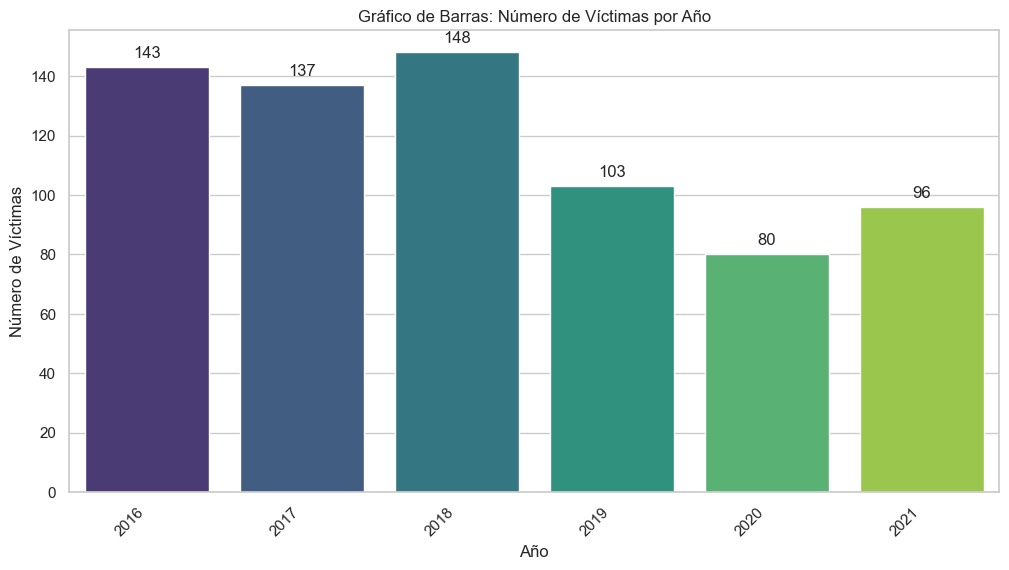

In [1135]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supongamos que 'hechos' tiene columnas 'AAAA' y 'N_VICTIMAS' que quieres utilizar en el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))

# Agrupar por Año y sumar el número de víctimas en cada año
pareto_data = hechos.groupby(['AAAA']).agg({'N_VICTIMAS': 'sum'}).reset_index()

# Ordenar los datos por año en orden ascendente
pareto_data = pareto_data.sort_values(by=['AAAA'])

# Paleta de colores (viridis) con diferentes intensidades según la cantidad de víctimas
colores = sns.color_palette('viridis', n_colors=len(pareto_data))

# Gráfico de barras con colores personalizados
sns.barplot(data=pareto_data, x='AAAA', y='N_VICTIMAS', palette=colores, ax=ax)

# Añadir etiquetas con los números de víctimas encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Etiquetas de los ejes y título
ax.set_xlabel('Año')
ax.set_ylabel('Número de Víctimas')
ax.set_title('Gráfico de Barras: Número de Víctimas por Año')

# Rotar etiquetas del eje x para mejor visibilidad
plt.xticks(rotation=45, ha='right')

plt.show()


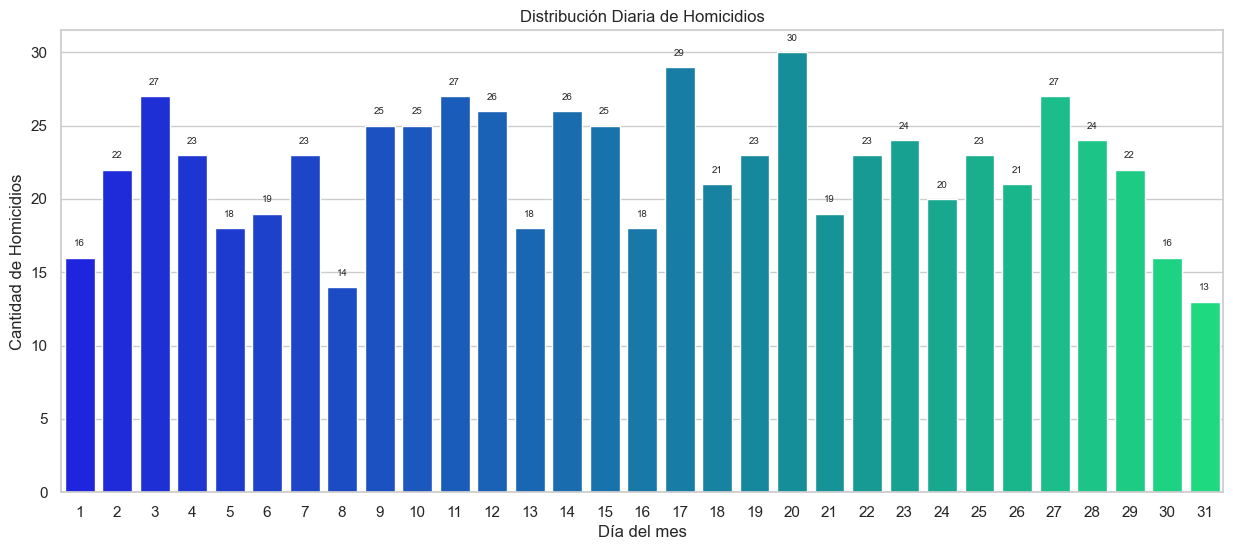

In [1136]:
#Distribucion diaria de los Homicidios
# Graficar la distribución con colores específicos
plt.figure(figsize=(15, 6))

ax = sns.countplot(x=hechos['DD'], palette='winter')
plt.title('Distribución Diaria de Homicidios')

plt.xlabel('Día del mes')
plt.ylabel('Cantidad de Homicidios')

# Agregar el total en la parte superior de las barras con texto ajustable
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", xytext=(0, 10), textcoords="offset points", fontsize=7)

# Ajustar el tamaño del texto aquí
plt.show()


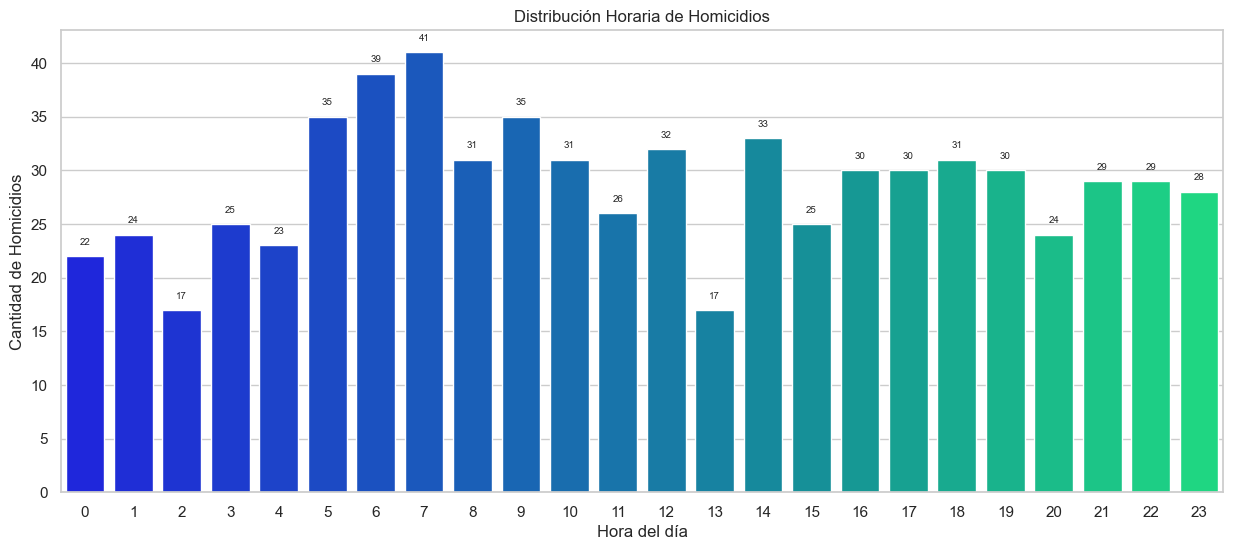

In [1137]:
#Distribucion horaria de los homicidios
# Graficar la distribución con colores específicos
plt.figure(figsize=(15, 6))

ax = sns.countplot(x=hechos['HH'], palette='winter')
plt.title('Distribución Horaria de Homicidios')

plt.xlabel('Hora del día')
plt.ylabel('Cantidad de Homicidios')

# Agregar el total en la parte superior de las barras con texto ajustable
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", xytext=(0, 10), textcoords="offset points", fontsize=7)

# Ajustar el tamaño del texto aquí
plt.show()

In [1138]:
hechos.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,COMUNA,UBICACION
count,687.000000,687,687.000000,687.000000,687.000000,687.000000,687.000000,653.000000
mean,1.029112,2018-09-16 06:36:09.432314368,2018.193595,6.695779,15.928675,11.660844,7.411936,0.802450
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,2017-04-03 00:00:00,2017.000000,4.000000,9.000000,6.000000,4.000000,1.000000
50%,1.000000,2018-07-15 00:00:00,2018.000000,7.000000,16.000000,11.000000,8.000000,1.000000
75%,1.000000,2020-01-04 12:00:00,2020.000000,10.000000,23.000000,17.000000,11.000000,1.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,23.000000,15.000000,1.000000
std,0.176695,NaN,1.682205,3.574574,8.635096,6.685127,4.380653,0.398456


In [1139]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687 entries, 0 to 695
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     687 non-null    object        
 1   N_VICTIMAS             687 non-null    int64         
 2   FECHA                  687 non-null    datetime64[ns]
 3   AAAA                   687 non-null    int64         
 4   MM                     687 non-null    int64         
 5   DD                     687 non-null    int64         
 6   HH                     687 non-null    int64         
 7   TIPO_DE_CALLE          687 non-null    object        
 8   Dirección Normalizada  687 non-null    object        
 9   COMUNA                 687 non-null    int64         
 10  pos x                  687 non-null    object        
 11  pos y                  687 non-null    object        
 12  PARTICIPANTES          687 non-null    object        
 13  VICTIMA   



---


**EDA de Dataset Victimas**


---



In [1140]:
victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [1141]:
victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [1142]:
victimas['EDAD'] = pd.to_numeric(victimas['EDAD'], errors='coerce')
victimas['EDAD'] = victimas['EDAD'].astype('Int64')

In [1143]:
#valores nulos y faltantes del dataset victimas

victimas.isnull().sum()


ID_hecho                0
FECHA                   0
AAAA                    0
MM                      0
DD                      0
ROL                     0
VICTIMA                 0
SEXO                    0
EDAD                   53
FECHA_FALLECIMIENTO     0
dtype: int64

In [1144]:
# Selecciona las filas donde el valor en la columnaEDAD' no es faltante
victimas[pd.notna(victimas['EDAD'])]

# Elimina valores faltantes en su lugar
victimas.dropna(subset=['EDAD'], inplace=True)

In [1145]:
#valores nulos y faltantes del dataset victimas

victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

In [1146]:
victimas.columns


Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

**Valores únicos en cada columna de victimas:**
ID_hecho               648
FECHA                  568
AAAA                     6
MM                      12
DD                      31
ROL                      5
VICTIMA                  8
SEXO                     2
EDAD                    85
FECHA_FALLECIMIENTO    536
dtype: int64


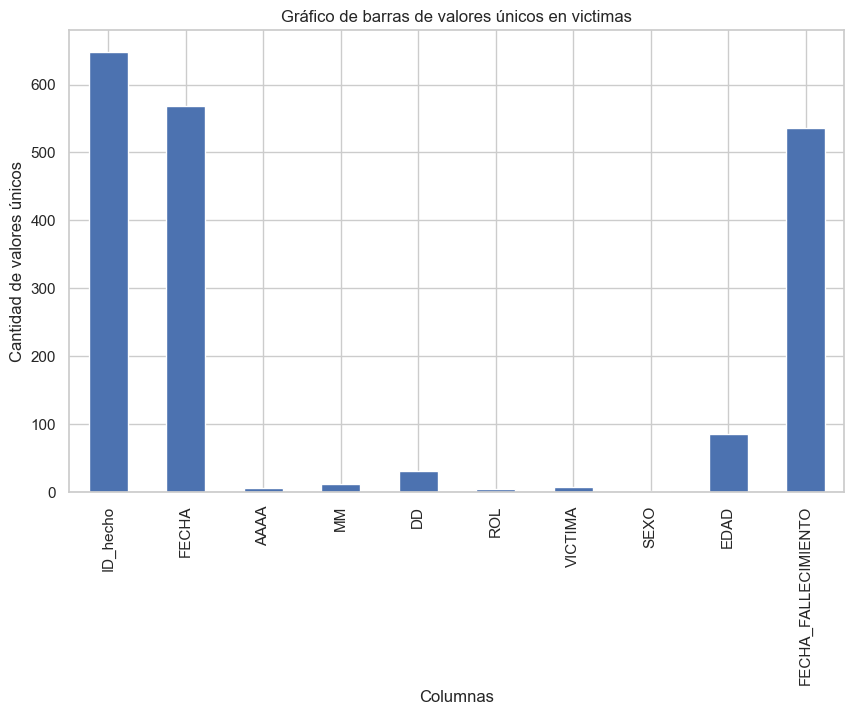

In [1147]:
# Contar valores únicos en cada columna de victimas
victimas_unique_counts = victimas.nunique()

# Imprimir los resultados
print("**Valores únicos en cada columna de victimas:**")
print(victimas_unique_counts)

# Grafico de barras de valores únicos en victimas
plt.figure(figsize=(10, 6))
victimas_unique_counts.plot(kind="bar")
plt.title("Gráfico de barras de valores únicos en victimas")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de valores únicos")
plt.show()


In [1148]:
victimas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             664 non-null    object        
 1   FECHA                664 non-null    datetime64[ns]
 2   AAAA                 664 non-null    int64         
 3   MM                   664 non-null    int64         
 4   DD                   664 non-null    int64         
 5   ROL                  664 non-null    object        
 6   VICTIMA              664 non-null    object        
 7   SEXO                 664 non-null    object        
 8   EDAD                 664 non-null    Int64         
 9   FECHA_FALLECIMIENTO  664 non-null    object        
dtypes: Int64(1), datetime64[ns](1), int64(3), object(5)
memory usage: 57.7+ KB


In [1149]:
victimas.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

In [1150]:
victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [1151]:
victimas["FECHA"].dtypes

dtype('<M8[ns]')

In [1152]:
# Convert to string if it makes sense
victimas["FECHA"] = victimas["FECHA"].astype(str)



In [1153]:
print(hechos.info())
print("---------------------------")

<class 'pandas.core.frame.DataFrame'>
Index: 687 entries, 0 to 695
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     687 non-null    object        
 1   N_VICTIMAS             687 non-null    int64         
 2   FECHA                  687 non-null    datetime64[ns]
 3   AAAA                   687 non-null    int64         
 4   MM                     687 non-null    int64         
 5   DD                     687 non-null    int64         
 6   HH                     687 non-null    int64         
 7   TIPO_DE_CALLE          687 non-null    object        
 8   Dirección Normalizada  687 non-null    object        
 9   COMUNA                 687 non-null    int64         
 10  pos x                  687 non-null    object        
 11  pos y                  687 non-null    object        
 12  PARTICIPANTES          687 non-null    object        
 13  VICTIMA   

In [1154]:
# Convertir la columna FECHA a datetime
victimas['FECHA'] = pd.to_datetime(victimas['FECHA'])


In [1155]:
print(victimas.info())
print("---------------------------")

<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             664 non-null    object        
 1   FECHA                664 non-null    datetime64[ns]
 2   AAAA                 664 non-null    int64         
 3   MM                   664 non-null    int64         
 4   DD                   664 non-null    int64         
 5   ROL                  664 non-null    object        
 6   VICTIMA              664 non-null    object        
 7   SEXO                 664 non-null    object        
 8   EDAD                 664 non-null    Int64         
 9   FECHA_FALLECIMIENTO  664 non-null    object        
dtypes: Int64(1), datetime64[ns](1), int64(3), object(5)
memory usage: 57.7+ KB
None
---------------------------


In [1156]:
# Convertir 'ID_hecho' de 'victimas' a str
victimas['ID_hecho'] = victimas['ID_hecho'].astype(str)

# Convertir 'ID' de 'hechos' a str
hechos['ID'] = hechos['ID'].astype(str)



In [1157]:
df_siniestros_final = pd.merge(victimas, hechos, 
                        left_on=["ID_hecho","AAAA","FECHA", "MM", "DD", "VICTIMA"], 
                        right_on=["ID", "AAAA","FECHA", "MM", "DD", "VICTIMA"])

# Mostrar las primeras filas del DataFrame combinado
print(df_siniestros_final.head())




    ID_hecho      FECHA  AAAA  MM  DD        ROL VICTIMA       SEXO  EDAD  \
0  2016-0001 2016-01-01  2016   1   1  CONDUCTOR    MOTO  MASCULINO    19   
1  2016-0002 2016-01-02  2016   1   2  CONDUCTOR    AUTO  MASCULINO    70   
2  2016-0003 2016-01-03  2016   1   3  CONDUCTOR    MOTO  MASCULINO    30   
3  2016-0004 2016-01-10  2016   1  10  CONDUCTOR    MOTO  MASCULINO    18   
4  2016-0005 2016-01-21  2016   1  21  CONDUCTOR    MOTO  MASCULINO    29   

   FECHA_FALLECIMIENTO  ... N_VICTIMAS  HH  TIPO_DE_CALLE  \
0  2016-01-01 00:00:00  ...          1   4        AVENIDA   
1  2016-01-02 00:00:00  ...          1   1       GRAL PAZ   
2  2016-01-03 00:00:00  ...          1   7        AVENIDA   
3                   SD  ...          1   0        AVENIDA   
4  2016-02-01 00:00:00  ...          1   5        AVENIDA   

                               Dirección Normalizada COMUNA         pos x  \
0  PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...      8  -58.47533969   
1               

In [1158]:
df_siniestros_final

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,...,N_VICTIMAS,HH,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,pos x,pos y,PARTICIPANTES,ACUSADO,UBICACION
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00,...,1,4,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.47533969,-34.68757022,MOTO-AUTO,AUTO,1.0
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00,...,1,1,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.50877521,-34.66977709,AUTO-PASAJEROS,PASAJEROS,1.0
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00,...,1,7,AVENIDA,ENTRE RIOS AV. 2034,1,-58.39040293,-34.63189362,MOTO-AUTO,AUTO,0.0
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD,...,1,0,AVENIDA,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.46503904,-34.68092974,MOTO-SD,SD,1.0
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00,...,1,5,AVENIDA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.38718297,-34.62246630,MOTO-PASAJEROS,PASAJEROS,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00,...,1,6,AVENIDA,RIVADAVIA AV. y PUEYRREDON AV.,3,-58.40596860,-34.61011987,PEATON-AUTO,AUTO,1.0
647,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00,...,1,17,AVENIDA,RIESTRA AV. y MOM,7,-58.43353773,-34.64561636,MOTO-AUTO,AUTO,1.0
648,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00,...,1,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,-58.46739825,-34.65117757,MOTO-AUTO,AUTO,1.0
649,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00,...,1,0,AVENIDA,GAONA AV. y TERRADA,11,-58.47293407,-34.61984745,MOTO-CARGAS,CARGAS,1.0


In [1159]:
# Reemplaza 'ruta_del_archivo.csv' con la ubicación y nombre de archivo deseados
ruta_del_archivo_csv = 'df_siniestros_final.csv'

# Exportar el DataFrame a un archivo CSV
df_siniestros_final.to_csv(ruta_del_archivo_csv, index=False)

# Imprimir un mensaje de confirmación
print(f"DataFrame exportado exitosamente a '{ruta_del_archivo_csv}' en formato CSV.")


DataFrame exportado exitosamente a 'df_siniestros_final.csv' en formato CSV.


In [1160]:
import sqlalchemy
import pandas as pd

# Reemplaza 'nombre_de_usuario', 'contraseña', 'nombre_de_base_de_datos' con tus propios valores
nombre_de_usuario = 'ud1dooj45ylgp9et'
contraseña = '7CtfW2v6vClzQWzw5GEF'
nombre_de_base_de_datos = 'bzhmeejph3z1vgbjnzlg'
host = 'bzhmeejph3z1vgbjnzlg-mysql.services.clever-cloud.com'

# Crear la conexión a la base de datos utilizando mysql-connector-python
engine = sqlalchemy.create_engine(f'mysql+mysqlconnector://{nombre_de_usuario}:{contraseña}@{host}/{nombre_de_base_de_datos}')

# Imprimir mensaje si la conexión es exitosa
try:
    connection = engine.connect()
    print("Conexión con la base de datos MySQL exitosa.")
except Exception as e:
    print(f"Error al conectar con la base de datos MySQL: {e}")

# Exportar el DataFrame a la tabla 'siniestros'
df_siniestros_final.to_sql('siniestros', engine, if_exists='replace', index=False)



Conexión con la base de datos MySQL exitosa.


651